## Проект по анализу и прогнозированию продаж для компьютерных игр.

#### Краткое описание проекта.

Мы работаем в отделе аналитики интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Мы получили информацию из открытых источников, а именно - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Наша задача выявить определяющие успешность игры закономерности, чтобы в дальнейшем спланировать рекламные компании и сделать ставку на самые успешные продукты.

#### Основные задачи. 

* Откроем и изучим общую информацию о данных
* Произведем обработку данных
* Выявим и исправим ошибки в данных, в случае наличия
* Проведем анализ данных за актуальный период
* Составим портрет пользователя по регионам
* Проверим сформированные гипотезы
* Подведем итоги и дадим рекомендации

#### Описание данных.

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

------

*** Данные за 2016 год могут быть неполными. *** (учтем данный факт)

### Обзор данных.

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import missingno as msno

In [3]:
# предотвратим ошибки при выгрузке данных
import os

pth1 = '/datasets/games.csv'
if os.path.exists(pth1):
    query_1 = pd.read_csv(pth1)
else:
    ('Something is wrong')

In [4]:
# выгружаем данные
path = 'C:\\Users\\tbyni\\Рабочий стол\\Проекты ЯП_ДА\\Яндекс_13ый_проект_ДА\\'
games = pd.read_csv(path + 'games.csv', sep = ',')
# games.sample(5)

Выгрузка проведена успешно. Напишем функцию чтобы просмотреть информацию и принять решения о предобработке данных.

In [5]:
# просматриваем информацию
def information (x):
    display(x.head(10))
    display(x.info())
    display(x.isna().sum())
    display(x.duplicated().sum())
information(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

0

#### Вывод

* Получена таблица с данными games.csv. (11 столбцов, 16715 строк)
* В данных присутствуют пропущенные значения в следующих столбцах:
  * Name - 2
  * Year_of_Release - 269
  * Genre - 2
  * Critic_Score - 8578
  * User_Score - 6701
  * Rating - 6766
* Отсутствуют явные дубликаты (в обработке стоит проверить категориальные значения на уникальность)
* Неверный формат данных:
  * Year_of_Release - float изменим на int 
  * User_Score - object изменим на float
* Приведем названия столбцов в нижний регистр

## Предобработка данных.

In [6]:
# проводим названия столбцов к нижнему регистру
games.columns = [i.lower() for i in games.columns]

<AxesSubplot:>

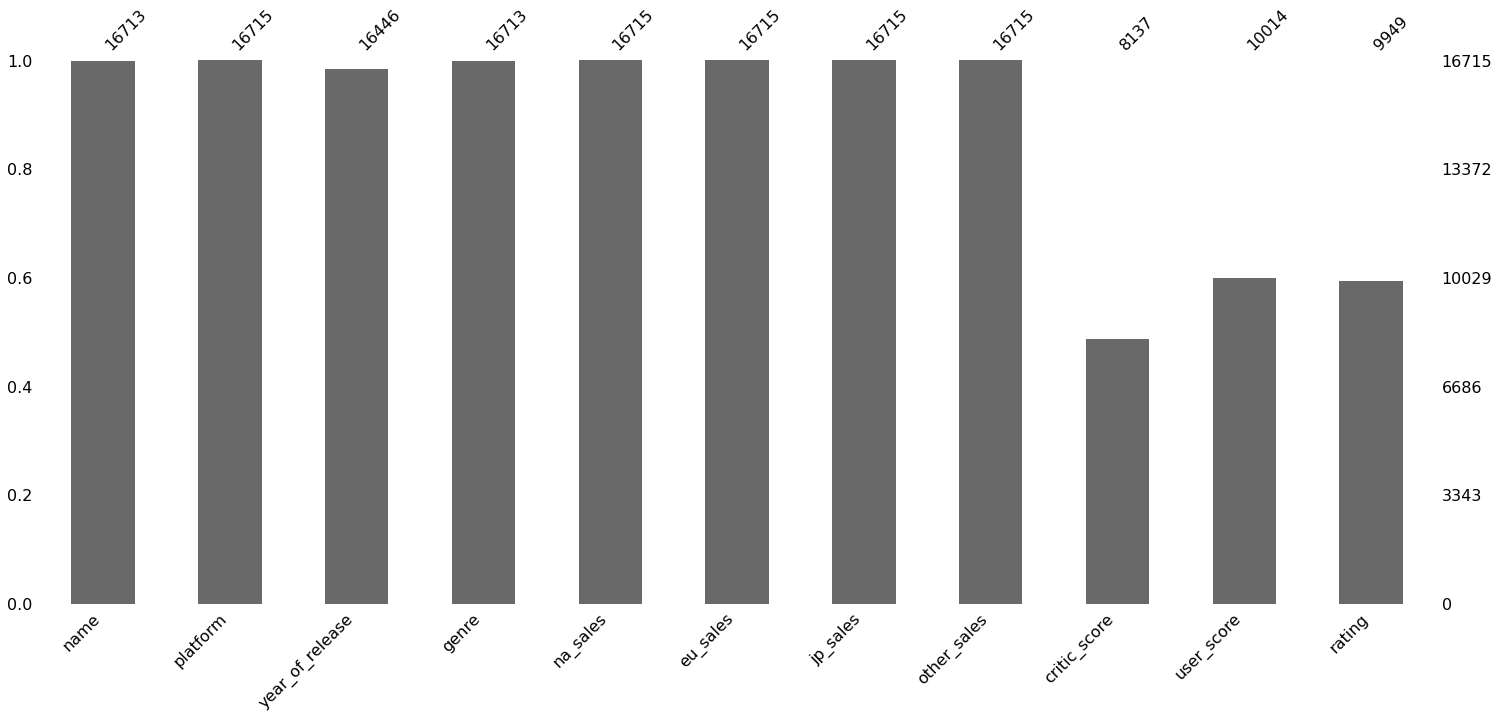

In [7]:
 # визуализируем процент пропущенных значений
msno.bar(games)

* Как мы можем заметить из полученной гистограммы, мы имеем следующее процентное соотношение в пропусках: 
  * critic_score ~50% 
  * rating ~40%
  * user_score ~40%
  * year_of_release >5%
  *т.к в столбцах name и genre по 2 значения процент не указываем, но для себя отметим, что совпадение странное и необходимо проверить возможно это задвоенная игра. 

Далее нам необходимо обработать пропуски и поменять форматы данных перед проведением анализа данных. 

In [8]:
# просматриваем пропущенные столбцы в name
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как мы можем заметить из полученного результата подтвердилась наша догадка о том, что пропущенные значения в name и genre совпадают, в данном случае думаю мы можем смело удалить данные строки, т.к все необходимые данные пропущены.  

In [9]:
# удаляем пропущенные значения для name и genre
games.dropna(subset=['name'], how='all', inplace=True)
# games.isna().sum() # check

Очистка столбцов name и genre проведена успешно. Т.к мы составляем прогноз во временном интервале, то на мой взгляд столбцы без указания года для нас не актуальны + таких данных менее 5%, поэтому предлагаю удалить эти данные и сразу изменить тип данных на верный. 

In [10]:
# удаляем пропущенные значения и меняем тип данных
games.dropna(subset=['year_of_release'], how='all', inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int32')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


Далее изучим столбцы critic_score и user_score. 

In [11]:
# просматриваем уникальные значения с оценками критиков
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [12]:
# просматриваем уникальные значения с оценками юзеров
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Просмотрев уникальные значения в столбцах можем отметить, что в user_score помимо nan, есть еще tbd, как известно данные мы брали из открытых истоников и это скорее всего сайт Metacritic (есть интересная статья на эту тему - https://habr.com/ru/post/519264/). tbd - to be determined, значит, что для данной игры оценка еще не определена и это по факту тот же nan. Чтобы запонить пропуски и не потерять данные я предлагаю воспользоваться методом замены на случайное (индикаторное), мы могли бы проставить нули, но чтобы было проще использовать фильтрацию заменим пропуски на минус 1.

In [13]:
# меняем формат данных и подставляем значения
games['user_score'] = games['user_score'].replace('tbd', np.NaN).astype('float').fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)

In [14]:
# просматриваем rating
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Прежде чем заполнять пропуски стоит дать расшифровку сокращений согласно рейтингу компании ESRB.
* E - Подходит для всех возрастных категорий.
* M - Подходит для лиц старше 17 лет.
* T - Подходит для лиц старше 13 лет.
* E10+ - Подходит для лиц старше 10 лет. 
* K-A - старый рейтинг который должен был войти в Е, рейти для детей 10+.
* AO - Подходит для взрослых старше 18 лет. 
* EC - Подходит для детей от 3 лет.
* RP - Категория ещё не присвоена.
___
Как итог для исследования мы можем объединить часть категорий. Рейтинг К-А мы добавим в Е10+, а пропуски заменим на RP.

In [15]:
# заполняем пропуски и корректируем категории
games['rating'] = games['rating'].fillna('RP').replace('K-A', 'E10+')

In [16]:
# получаем отдельный столбец суммарных продаж по всем регионам
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [17]:
information(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,RP,28.31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


None

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

0

#### Вывод.

* Названия столбцов приведена в нижний регистр
* Были обработаны пропущенные значения:
  * name и genre мы предположили, что данные были задвоенны, просто первая строка для игр из европы и северной америки, а вторая для азии, было решено удалить, т.к нет информативности в данных
  * Пропущенные значения столбца year_of_release были так же удалены, т.к мы изучаем информацию во временном интервале, а соответственно данные без года для нас не актуальны + потери менее 5%
  * Далее мы изучали пропущенные значения в столбцах critic_score и user_score, доля пропущенных значений весьма велика для данных столбцов и чтобы не потерять необходимые значения мы решили заполнить пропуски индикаторными значениями, а чтобы было удобно фильтроваться вместо нуля использовали -1
  * rating содержит возрастные ограничения которые составляет компания ESRB, как известно компания основана в 1994 году, поэтому есть шанс, что пропуски возникли в связи с этим, поэтому мы решили заполнить пропуски известной категорией - RP(категория не присвоена)
* Далее изменили формат данных на корректный в следующих столбцах: 
  * year_of_release - int
  * user_score - float
* Создали столбец с общими продажами по всем регионам

## Исследовательский анализ данных. 

Для начала просмотрим, как выпускались игры по годам. 

In [18]:
# формируем сводные данные по кол-ву игр в год
games_of_year = pd.pivot_table(games, index=['year_of_release'], values=['name'], aggfunc='count')
games_of_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


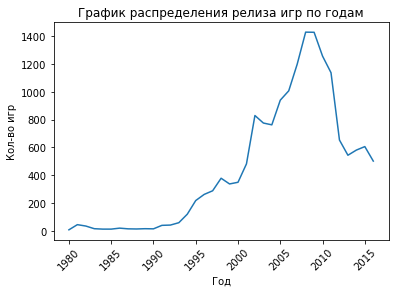

In [19]:
# визуализируем график
plt.plot(games_of_year)
plt.xticks(rotation=45)
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.title('График распределения релиза игр по годам')
plt.show()

Как можем заметить согласно нашему срезу, резкий скачок в выпуске игр мы можем наблюдать в конце 90х начале 00х, когда стали появляться такие топовые линейки игр, как Call of Duty, Grand Theft Auto, Fifa, достигнув своего пика в 2008-2009 году. Далее с развитием мобильных технологий (появление iphone в 2007, а потом и angry birds в 2009 )

In [20]:
# просматриваем заработок для каждой платформы
games_of_platform = pd.pivot_table(games, index=['platform'], values=['total_sales'], aggfunc='sum')
games_of_platform.sort_values(by = 'total_sales', ascending = False).head(20)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выделим платформы с наибольшими сумарными продажами. Возьмем топ 10 платформ

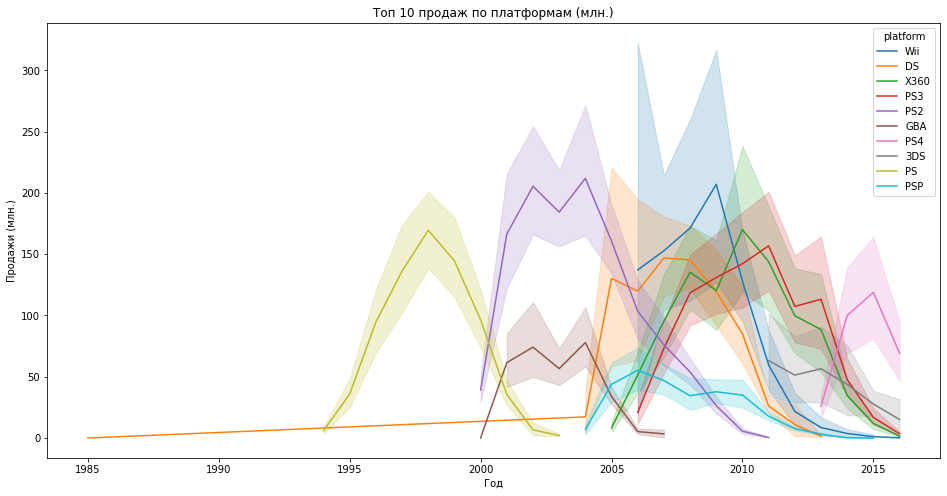

In [21]:
# получим топ 10 и посмотрим распределение по годам
games_of_platform_top = games_of_platform.query('total_sales > 256')
top = games.query('platform in @games_of_platform_top.index')
plt.figure(figsize=(16,8))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=top, estimator=sum)
ax = sns.lineplot()
ax.set_xlabel('Год')
ax.set_ylabel('Продажи (млн.)')
ax.set_title('Топ 10 продаж по платформам (млн.)')
plt.show()

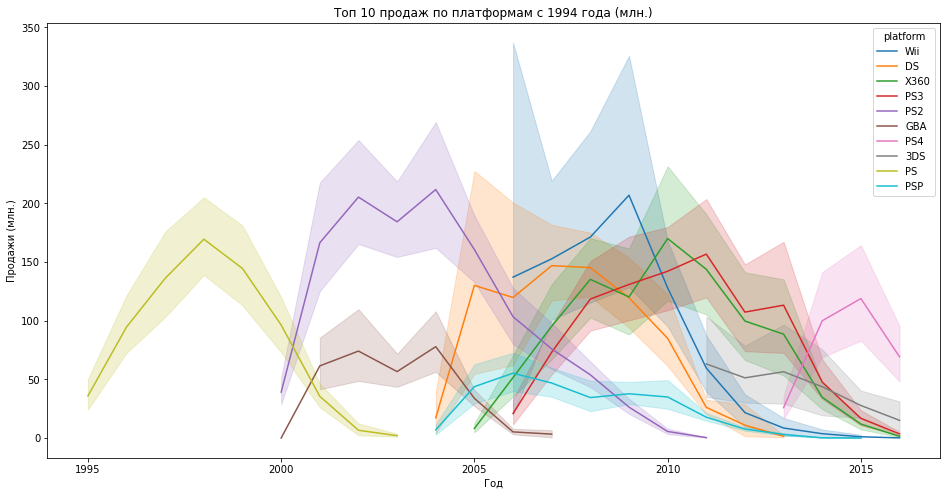

In [22]:
# детализируем наш топ
games_of_platform_top = games_of_platform.query('total_sales > 256')
top = games.query('platform in @games_of_platform_top.index')
plt.figure(figsize=(16,8))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=top.query('year_of_release > 1994'), estimator=sum)
ax = sns.lineplot()
ax.set_xlabel('Год')
ax.set_ylabel('Продажи (млн.)')
ax.set_title('Топ 10 продаж по платформам c 1994 года (млн.)')
plt.show()

Как мы можем заметить начиная с 00х срок службы платформы около 10 лет. Наш график подтвеждает, что после 14ого года примерно закончился резкий спад, который был обусловлен уходом когда культовых платформ, таких как PS2, PS3.

Из полученных ранее выводов можем предположить, что актуальным промежутком времени для нас будет начиная с 2012, кризис пройден, на разработку топовых игр уходит уйма времени, поэтому на мой взгляд резких взлетов, как в 00е ожидать не приходится.

In [23]:
# получаем актуальное время
actual_time = games.query('year_of_release >= 2012')

In [24]:
# просмотрим самые прибыльные платформы за актуальное время
big_deal_platform = pd.pivot_table(actual_time, index=['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')
big_deal_platform

total_sales
platform year_of_release             
3DS      2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2012                   11.01
         2013                    1.54
PC       2012                   23.22
         2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2012                    7.69
         2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2012                   16.19
         2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2012                   17.56
         2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

К 2016 году большинство платформ прошли пик своих продаж. В нашем выбранном временном отрезке явно выделяются 3 платформы: XOne, PS4, 3DS, т.к это самые новые платформы. Как мы можем заметить на примере PS3 и PS4, что примерно раз в 5 лет выходит новая модель и старая начинает "доживать" еще 5 лет для дальнейшего обновления. Плюс стоит отметить, что 3DS выбрана не случайно, все портативные приставки уже начинают устаревать и стоит ждать обновлений. 

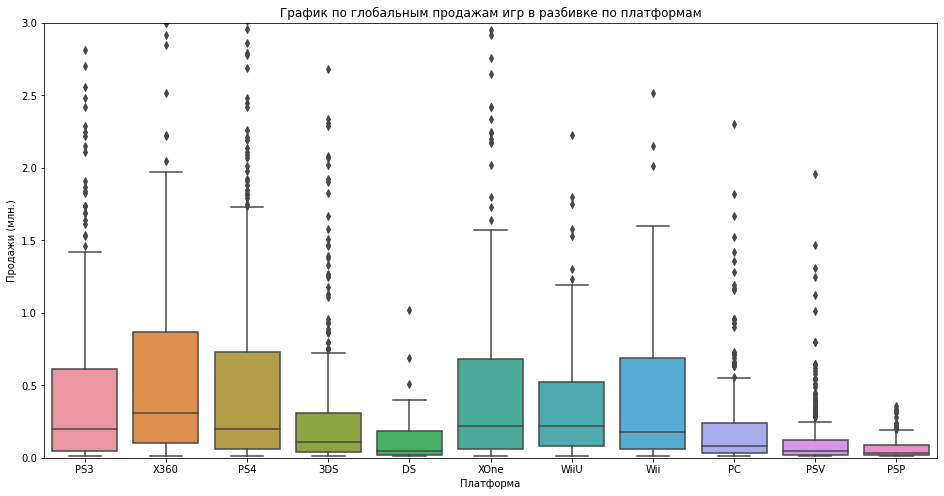

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

In [25]:
# строим ящик с усами для общей прибыли 
actual_time['total_sales'].describe()
plt.figure(figsize=(16,8))
sns.boxplot(x='platform', y='total_sales', data=actual_time).set(ylim=(0, 3))
ax = sns.lineplot()
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи (млн.)')
ax.set_title('График по глобальным продажам игр в разбивке по платформам')
plt.show()
actual_time['total_sales'].describe()

Можем заметить, что 75% продаж находятся в пределах 45млн. Выбросы могут быть обусловлены продажами топ жанров. Просмотрим данные в сравнении по топ три платформ.

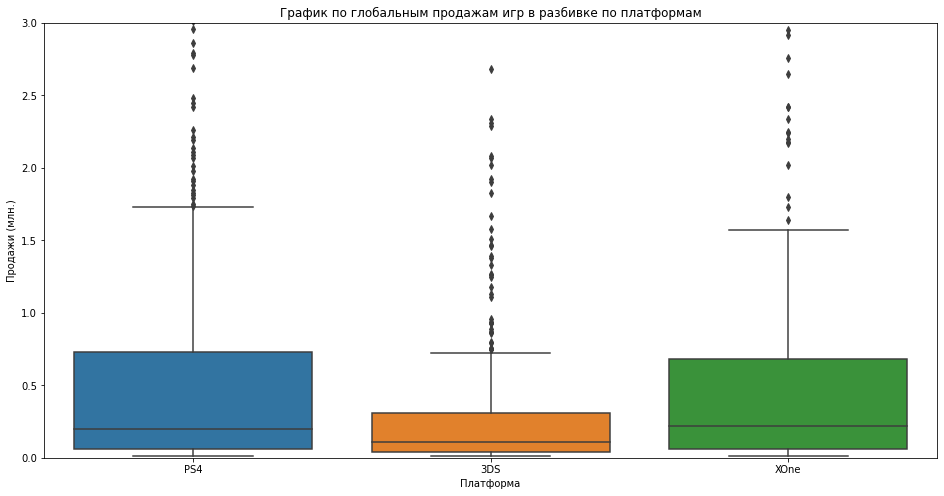

count    1035.000000
mean        0.645478
std         1.410076
min         0.010000
25%         0.050000
50%         0.160000
75%         0.570000
max        14.630000
Name: total_sales, dtype: float64

In [26]:
top_platform = actual_time[actual_time['platform'].isin(['PS4', 'XOne', '3DS'])]
top_platform['total_sales'].describe()
plt.figure(figsize=(16,8))
sns.boxplot(x='platform', y='total_sales', data=top_platform).set(ylim=(0, 3))
ax = sns.lineplot()
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи (млн.)')
ax.set_title('График по глобальным продажам игр в разбивке по платформам')
plt.show()
top_platform['total_sales'].describe()

Рассмотрев детально наш топ платформ, можем заметить, что выбросы присутствуют в каждой плфтформе, это может быть связано с тем, что некоторе игры имеют заоблачный успех, а некоторые практически не продаются.

Далее рассмотрим, как влияют на продажи внутри самой популярной платформы (PS4) отзывы пользователей и критиков. 

<AxesSubplot:>

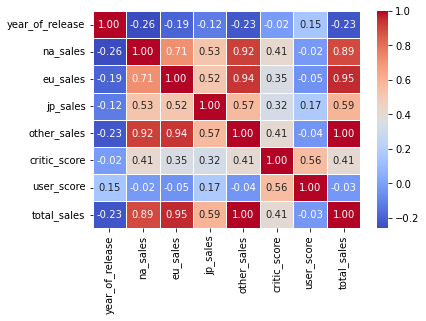

In [27]:
 # строим матрицу корреляций
influence_critic_ps4 = games[(games['platform'] == 'PS4') & (games['critic_score'] > 0) & (games['user_score'] > 0)].copy()
sns.heatmap(influence_critic_ps4.corr(), annot=True, fmt = '0.2f', linewidths=.5, cmap="coolwarm")

На продажи в первую очередь влияет оценка критиков, тогда как оценка юзеров не так важна. Однако, стоит отметить, что мнение юзеров коррелирует с мнение критиков. 

0.40589480145836687

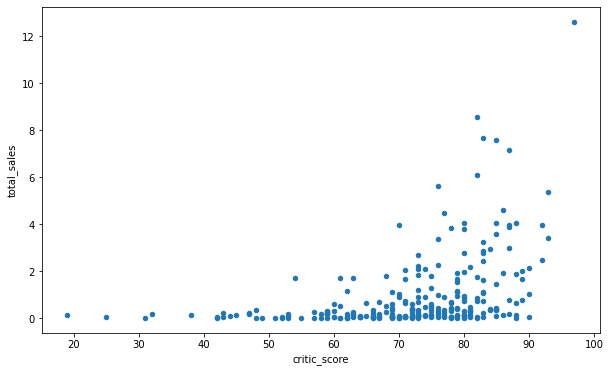

In [28]:
# строим диаграмму рассеяния с оценками критиков для PS4
influence_critic_ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,6))
influence_critic_ps4['critic_score'].corr(influence_critic_ps4['total_sales'])

Есть небольшая корреляция между высокими оценками критиков и продажами. 

-0.03362497596528878

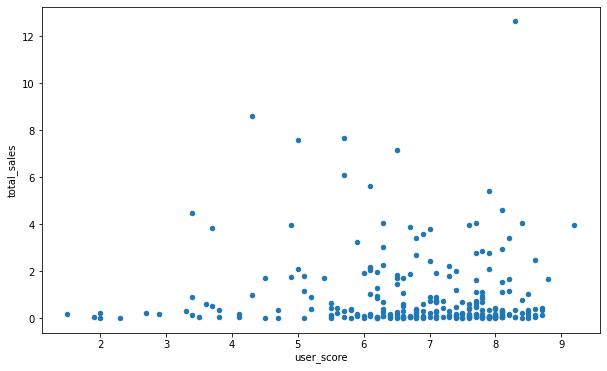

In [29]:
# строим диаграмму рассеяния с оценками юзеров для PS4
influence_critic_ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,6))
influence_critic_ps4['user_score'].corr(influence_critic_ps4['total_sales'])

Диаграммы рассеянивания подтверждают наши предыдущие выводы, за исключением редких исключений оценки игроков не сильно влияют на продажи.

Далее просмотрим корреляцию для других платформ.

0.33890386446332155

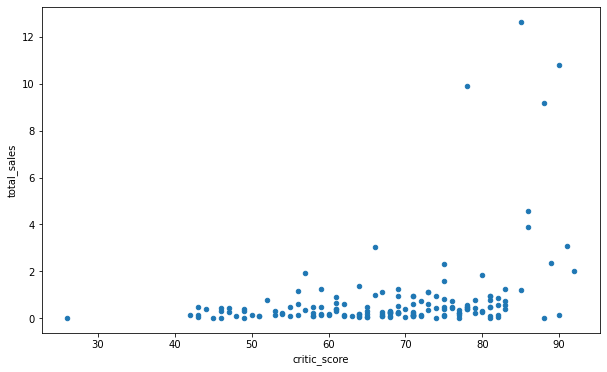

In [30]:
# строим диаграмму рассеяния с оценками критиков для 3DS
influence_critic_3DS = games[(games['platform'] == '3DS') & (games['critic_score'] > 0) & (games['user_score'] > 0)].copy()
influence_critic_3DS.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,6))
influence_critic_3DS['critic_score'].corr(influence_critic_3DS['total_sales'])

0.23208872237663558

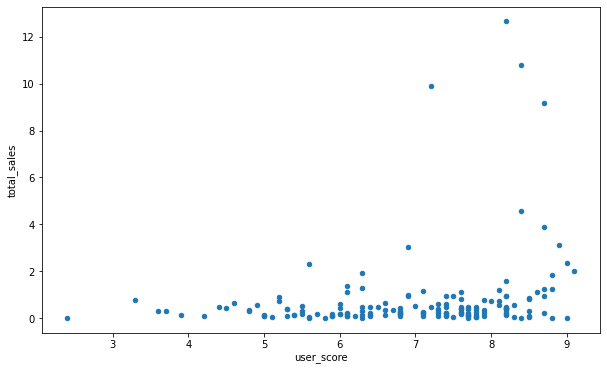

In [31]:
# строим диаграмму рассеяния с оценками юзеров для 3DS
influence_critic_3DS.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,6))
influence_critic_3DS['user_score'].corr(influence_critic_3DS['total_sales'])

0.41042203561296375

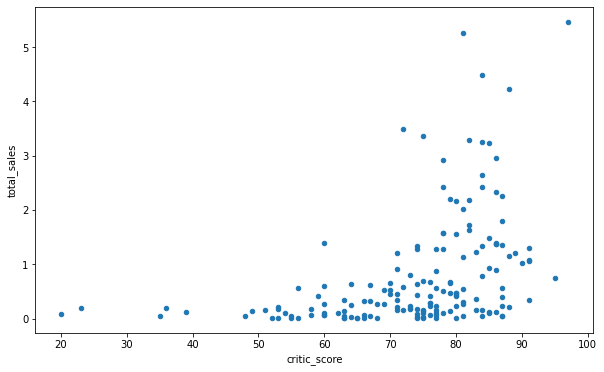

In [32]:
# строим диаграмму рассеяния с оценками юзеров для XOne
influence_critic_XOne = games[(games['platform'] == 'XOne') & (games['critic_score'] > 0) & (games['user_score'] > 0)].copy()
influence_critic_XOne.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,6))
influence_critic_XOne['critic_score'].corr(influence_critic_XOne['total_sales'])

-0.09400318326920852

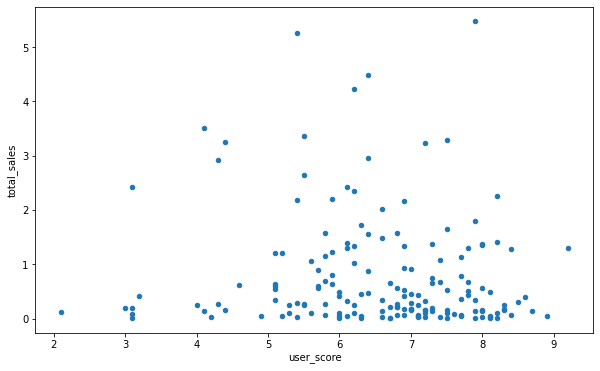

In [33]:
# строим диаграмму рассеяния с оценками юзеров для XOne
influence_critic_XOne.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,6))
influence_critic_XOne['user_score'].corr(influence_critic_XOne['total_sales'])

Как мы можем заметить, что приставки XOne и PS4 показывают приблизительно одинаковые результаты, есть корреляция при оценках критиков, однако отсутствует при оценках юзеров, думаю это может быть связано с тем, что люди могут покупать игры прочитав рецензии критиков и разочаровавшись ставят низкие оценки, хотя сейчас есть возможность просмотреть летсплей, я бы это учел в будущем. Однако стоит отметить наличие небольшой корреляции в обоих случая для портативной приставки 3DS, т.к это портативная приставка зачастую геймеры уже знают, что за игра перед покупкой, т.к скорее всего пробовали ее на приставке. 

In [34]:
# строим рапределение игр по жанрам
genre_distribution = games.pivot_table(index='genre', values='total_sales', aggfunc=['mean', 'median', 'count','sum'])
genre_distribution.columns = ['mean_sales', 'median_sales', 'count_sales', 'sum_sales']
genre_distribution.sort_values(by='sum_sales', ascending=False)

,mean_sales,median_sales,count_sales,sum_sales
genre,,,,
Action,0.519057,0.19,3307,1716.52
Sports,0.567940,0.22,2306,1309.67
Shooter,0.803519,0.24,1296,1041.36
Role-Playing,0.628683,0.18,1481,931.08
Platform,0.940262,0.27,878,825.55
Misc,0.459204,0.16,1721,790.29
Racing,0.590122,0.19,1226,723.49
Fighting,0.528865,0.21,837,442.66
Simulation,0.452695,0.15,857,387.96


Лидеры, как по производству так и по кол-ву продаж игры жанра 'Action' на мой взгляд это и не удивительно, т.к к этому жанру относятся одни из самых успешных игр такие, как: Red Dead Redemption и Half-Life. Однако в данном случае стоит учитывать, что не каждая игра данного жанра столь успешна. Далее следуют игры жанра спорт, тут стоит выделить на заметно высокие прибыли, думаю здесь большая заслуга у серии игр Fifa. Shooter жанр, тоже популярен и дает весьма хорошую прибыль и не стоит забывать, что порой игры относятся и к шутерам и к экшн, как например BioShock. 

<AxesSubplot:title={'center':'Сумма поддержки по годам'}, xlabel='genre'>

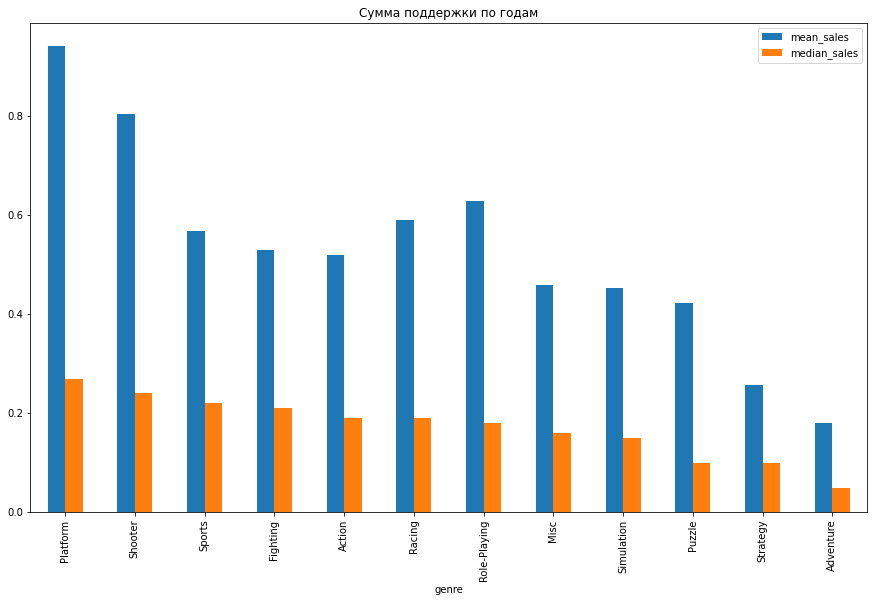

In [35]:
# строим график для наглядности
genre_distribution = games.pivot_table(index='genre', values='total_sales', aggfunc=['mean', 'median'])
genre_distribution.columns = ['mean_sales', 'median_sales']
genre_distribution.sort_values(by='median_sales', ascending = False).plot(kind = 'bar', figsize = (15,9), title = 'Сумма поддержки по годам')

Однако, помимо вышеуказанного сравнения в таблице, стоит отметить, что несмотря на головокружительные продажи вышеуказанных жанров, если мы рассматриваем долгосрочные планы, нам стоит обратить внимание на такие жанры, как Platform, несмотря на небольшие продажи они показывают относительно стабильную и высокую прибыль и меньше подвержены выбросам.

#### Вывод.

* На основании наших наблюдений, отметим следующее:
  * Пик игровой индустрии пришелся на период с 2002 по 2012 годы
  * В среднем платформа живет 10 лет, хотя уже спустя 5 лет компании стараются представить новинку, чтобы, думаю, как альтернативу
  * Самые прибыльными были приставки PS2, PS3, Xbox360, но тут стоит пометить, что эти прибыли пришлись на самое пиковое время для игр
  * Актуальное время для на будущего планирования мы определили в промежутке 2012 - 2016, в это время уже пройден пик продаж и стабилизтровалось падение
  * Как образец приставки мы взяли - PS4, данная приставка вышла в 2013 в актуальное для нас время + плюс она показывает хорошие уровни продаж
  * Интересный факт, что прибыль немного коррелириует с оценками критиков для приставок - XOne, PS4, которые мы определили, как самые успешные, когда как для 3DS есть корреляция, как с оценками критиков, так и с оценками юзеров
  * Мы выделили следующие жанры, как наиболее прибыльные: Action, Sports, Shooter.

### Составим портрет пользователя каждого региона.

* Работать будем со следующими регионами: 
  * NA - Северная Америка
  * EU - Европейский регион
  * JP - Азиатский регион (Япония)

In [36]:
# доля продаж в северной америке
part_of_america = actual_time.pivot_table(index='platform', values=['na_sales'], aggfunc=['count', 'sum']).sort_values(by=( 'sum', 'na_sales'), ascending=False)
part_of_america

,count,sum
,na_sales,na_sales
platform,,
X360,292,140.05
PS4,392,108.74
PS3,493,103.38
XOne,247,93.12
3DS,396,55.31
WiiU,147,38.10
PC,250,19.12
Wii,54,17.45


In [37]:
# доля продаж в европе
part_of_europe = actual_time.pivot_table(index='platform', values=['eu_sales'], aggfunc=['count', 'sum']).sort_values(by=( 'sum', 'eu_sales'), ascending=False)
part_of_europe

,count,sum
,eu_sales,eu_sales
platform,,
PS4,392,141.09
PS3,493,106.86
X360,292,74.52
XOne,247,51.59
3DS,396,42.64
PC,250,37.76
WiiU,147,25.13
Wii,54,11.92


In [38]:
# доля продаж в японии
part_of_japan = actual_time.pivot_table(index='platform', values=['jp_sales'], aggfunc=['count', 'sum']).sort_values(by=( 'sum', 'jp_sales'), ascending=False)
part_of_japan

,count,sum
,jp_sales,jp_sales
platform,,
3DS,396,87.79
PS3,493,35.29
PSV,411,21.04
PS4,392,15.96
WiiU,147,13.01
PSP,173,10.47
DS,31,3.72
Wii,54,3.39


* Региональная прибыль разделилась на следующие части по платформам: 
  * Северная Америка - X360, PS4, PS3, XOne, 3DS
  * Европа - PS4, PS3, X360, XOne, 3DS
  * Япония - 3DS, PS3, PSV, PS4, Wii

В Северной Америке "классическое" противостояние XBox и PS, что ожидаемо Microsoft занимает большую часть рынка в Северной Америке. В Европе большую часть рынка занимает PS, причем топовая версия. Тогда, как в Японии лидер 3DS, можно предположить, что локальная платформа более адаптирована на местный рынок.

In [39]:
# просматриваем топ жанр для северной америки
top_genre_na = pd.pivot_table(actual_time, index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
top_genre_na

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


In [40]:
# просматриваем топ жанров для европы
top_genre_eu = pd.pivot_table(actual_time, index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
top_genre_eu

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


In [41]:
# просматриваем топ жанров в японии
top_genre_jp = pd.pivot_table(actual_time, index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
top_genre_jp

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


* Региональная прибыль разделилась на следующие части по жанрам играм:
  * Северная Америка - Action, Shooter, Sports, Role-Playing, Misc
  * Европа - Action, Shooter, Sports, Role-Playing, Racing
  * Япония - Role-Playing, Action, Misc, Simulation, Fighting
  
Северная Америка очень похожа с Европой в выборе игр, тогда в Японии пользователи предпочитают совершенно иные жанры, здесь может подтвердиться наша мысль о том, под разные платформы локализованы разные игры.

In [42]:
# просматриваем влияние рейтинга ESRB в Северной Америке
ESRB_region_na = pd.pivot_table(actual_time, index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
ESRB_region_na

,na_sales
rating,
M,231.57
E,114.37
RP,103.31
E10+,75.70
T,66.02


In [43]:
# просматриваем влияние рейтинга ESRB в Европе
ESRB_region_eu = pd.pivot_table(actual_time, index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
ESRB_region_eu

,eu_sales
rating,
M,193.96
E,113.03
RP,91.50
E10+,55.37
T,52.96


In [44]:
# просматриваем влияние рейтинга ESRB в Японии
ESRB_region_jp = pd.pivot_table(actual_time, index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
ESRB_region_jp

,jp_sales
rating,
RP,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


* Региональная прибыль разделилась на следующие части по влиянию рейтинга ESRB:
  * Северная Америка - M, E, RP
  * Европа - M, E, RP
  * Япония - RP, E, T
Северная Америка очень похожа с Европой в выборе игр, где на первом находятся, "M - Подходит для лиц старше 17 лет", что очевидно игры Action зачастую относятся ко взрослой категории, далее идет 'E - Подходит для всех возрастных категорий', думаю связано с популярностью игр для детей. В Японии на первом месте рейтинг RP, возможно часть игр когда-то выходила только для внутреннего рынка ну и на втором месте ожидаемо игры для всех. 

####  Вывод

Проведя анализ нашего типичного пользователя, можем с уверенностью сказать, что пользователи Северной Америки и Европы похожи, им от 17 лет, их любимые жанры Action и Shooter на которых оказывает влияние мнение критиков на игры различаясь, лишь в том, что американцы играют на XBox, а европейцы на PS. В Японии наши пользователи более юные им от 13 лет, их любимые жанры Role-Playing и Action в которые они играют на портативных приставках и единственное в чем они похожи с западными юзерами только то, что на них так же влияет мнение критиков. 

### Проверка гипотез. 

- Нам необходимо проверить гипотезу:
  - H₀ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  - H₁ - Средние пользовательские рейтинги платформ Xbox One и PC разные
- Критический уровень статистической значимости = .05

In [45]:
# проверяем гипотезу
xbox_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
alpha = .05

results = st.ttest_ind(xbox_ratings, pc_ratings)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


Компьютерные игры показывают более уверенные оценки по сравнению с оценками XBox, что может быть связано с тем, что для выходило исконно больше игр. 

- Нам необходимо проверить гипотезу:
  - H₀ - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
  - H₁ - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковы.
- Критический уровень статистической значимости = .05

In [46]:
# проверяем гипотезу
avg_act_rate = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
avg_pc_rate = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
alpha = .05

results = st.ttest_ind(avg_act_rate, avg_pc_rate)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


В данном случае не удалось опровергнуть гипотезу, хоть игры жанра спортс выходят реже и меньше, они очень популярна. 

## Общий вывод.

- Мы провели исследование согласно ранее намеченному плану:
  - Просмотрели динамику выхода игр во времени
  - Составили топ самых продаваемых платформ
  - Выявили срок жизни моделей платформ
  - Выявили зависимость продаж от оценок критиков 
  - Уточнили наиболее популярные жанры игр 
  - Составили портрет юзеров по регионам 
  - Проверили гипотезы 

- Продажи игр зависят от нескольких факторов: 
  - Компания выпустившая приставку и игру
  - Жанр игры
  - Частота обновления платформ
  - Оценка критиков

Планируя продажи на 2017 год нам необходимо в первую очередь определится на какой регион мы ориентируемся, т.к если планируем работать с западным рынком, то нам необходимо сделать упор на передовые приставки, как PS4 и XOne, однако стоит отметить, что и их популярность уже начинает угасать и необходимо планировать объемы чтобы вовремя обновится. Наиболее популярные жанры на западном рынке: Action и Shooter из чего следует, что наш типичный пользователь старше 17 лет и на него хорошо действует мерч, который может принести дополнительные средства, как было с выходом GTA5, когда можно было купить игру с эксклюзивной бейсболкой. Так же необходим мониторинг оценок критиков. 

----
Если мы планируем продажи на японском рынке, то здесь думаю необходимо сделать упор на портативные приставки, но и здесь стоит ждать скорого выхода нового игрока, т.к 3DS вышла уже аж в 2011 и стоит ждать скорого обновления. Наиболее популярны игры для всей семьи  жанра Role-Playing, такие как Mario. И не стоит забывать, что японцы так же зависимы от мнения критиков. 